# Next word Prediction :-

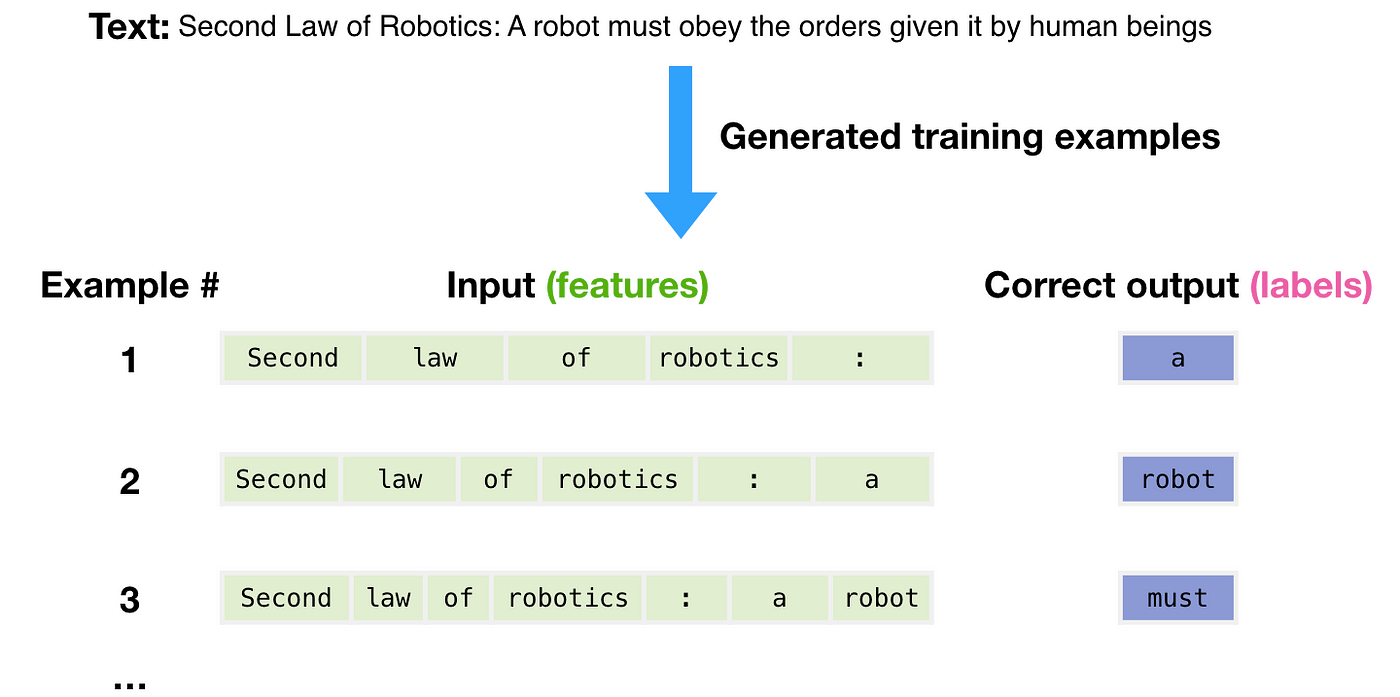

In [1]:
from IPython import display
display.Image('/content/Next word prediction 2.png')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras.layers import SimpleRNN,LSTM,GRU,Dense,Dropout,Embedding,Bidirectional
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import warnings
import nltk
nltk.download('punkt')
import string
from string import punctuation
from bs4 import BeautifulSoup
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
df=pd.read_csv("/content/medium_data.csv")
df

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30
...,...,...,...,...,...,...,...,...,...,...
6503,6504,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,6504.jpg,661,6,6,Better Marketing,2019-12-05
6504,6505,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,6505.jpeg,189,1,5,Better Marketing,2019-12-05
6505,6506,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,6506.jpg,207,1,8,Better Marketing,2019-12-05
6506,6507,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,6507.jpg,253,2,5,Better Marketing,2019-12-05


In [4]:
df.shape

(6508, 10)

In [5]:
df.columns

Index(['id', 'url', 'title', 'subtitle', 'image', 'claps', 'responses',
       'reading_time', 'publication', 'date'],
      dtype='object')

In [6]:
df.isnull().sum()

id                 0
url                0
title              0
subtitle        3029
image            147
claps              0
responses          0
reading_time       0
publication        0
date               0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Dealing with short words

In [8]:
!pip install optimal-data-selector

In [9]:
from optimal_data_selector.word import short_word_treatment
df['title']=df['title'].apply(lambda text:short_word_treatment(text))
df

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,a beginner ’ s guide to word embedding with ge...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,hands-on graph neural networks with pytorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,how to use ggplot2 in python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,databricks : how to save files in csv on your ...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,a step-by-step implementation of gradient desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30
...,...,...,...,...,...,...,...,...,...,...
6503,6504,https://medium.com/better-marketing/we-vs-i-ho...,“ we ” vs “ i ” — how should you talk about yo...,Basic copywriting choices with a big…,6504.jpg,661,6,6,Better Marketing,2019-12-05
6504,6505,https://medium.com/better-marketing/how-donald...,how donald trump markets himself,Lessons from who might be the most popular bra...,6505.jpeg,189,1,5,Better Marketing,2019-12-05
6505,6506,https://medium.com/better-marketing/content-an...,content and marketing beyond mass consumption,How to acquire customers without wasting money...,6506.jpg,207,1,8,Better Marketing,2019-12-05
6506,6507,https://medium.com/better-marketing/5-question...,5 questions all copywriters should ask clients...,Save time and effort by…,6507.jpg,253,2,5,Better Marketing,2019-12-05


In [10]:
df1=list(df['title'])
df1

['a beginner ’ s guide to word embedding with gensim word2vec model',
 'hands-on graph neural networks with pytorch & pytorch geometric',
 'how to use ggplot2 in python',
 'databricks : how to save files in csv on your local computer',
 'a step-by-step implementation of gradient descent and backpropagation',
 'an easy introduction to sql for data scientists',
 'hypothesis testing visualized',
 'introduction to latent matrix factorization recommender systems',
 'which 2020 candidate is the best at twitter ?',
 'what if ai model understanding were easy ?',
 "< em class= '' markup -- em markup -- h3-em '' > what i learned from ( two-time ) kaggle grandmaster abhishek thakur < /em >",
 'making a dota2 bot using ml',
 'building a ‘ serverless ’ chrome extension',
 'how to teach code',
 'reinventing personalization for customer experience',
 'how to automate hyperparameter optimization',
 'ideas : design methodologies for data sprints',
 'robosomm chapter 3 : wine embeddings and a wine recom

In [11]:
tok=Tokenizer(oov_token='<nothing>')
tok.fit_on_texts(df1)
c=tok.word_index

In [12]:
tokenizer=Tokenizer(oov_token='<nothing>')
tokenizer.fit_on_texts(df1)
tokenizer.word_index

{'<nothing>': 1,
 'to': 2,
 'the': 3,
 'strong': 4,
 'a': 5,
 'of': 6,
 'how': 7,
 'and': 8,
 '’': 9,
 'in': 10,
 'your': 11,
 "''": 12,
 'markup': 13,
 'you': 14,
 'for': 15,
 'with': 16,
 'is': 17,
 's': 18,
 '—': 19,
 'data': 20,
 'i': 21,
 'why': 22,
 'class': 23,
 'what': 24,
 'h3': 25,
 'on': 26,
 'learning': 27,
 'from': 28,
 'it': 29,
 'an': 30,
 't': 31,
 'are': 32,
 'can': 33,
 'be': 34,
 'my': 35,
 'writing': 36,
 'using': 37,
 'design': 38,
 'machine': 39,
 'ux': 40,
 'about': 41,
 'do': 42,
 'not': 43,
 'python': 44,
 'ai': 45,
 'we': 46,
 'that': 47,
 'life': 48,
 'when': 49,
 'should': 50,
 '5': 51,
 'science': 52,
 'make': 53,
 'time': 54,
 'as': 55,
 'need': 56,
 'more': 57,
 '3': 58,
 'at': 59,
 'business': 60,
 '”': 61,
 '“': 62,
 'or': 63,
 'part': 64,
 'work': 65,
 'have': 66,
 'new': 67,
 'don': 68,
 'up': 69,
 'by': 70,
 'get': 71,
 'write': 72,
 'use': 73,
 'guide': 74,
 'will': 75,
 '1': 76,
 'marketing': 77,
 'deep': 78,
 'ways': 79,
 'best': 80,
 'analysis': 

In [13]:
len_tok=[]
input_sequence=[]
for i in df1:
    ssd=tokenizer.texts_to_sequences([i])[0]
    len_tok.append(ssd)
    for i2 in range(1,len(ssd)):
        input_sequence.append(ssd[:i2+1])
seq_len=[]
for l in len_tok:
    seq_len.append(len(l))
maxlen=max(seq_len)

print("Maximum length is ={}".format(max(seq_len)))


Maximum length is =46


In [14]:
input_sequence[0:6]

[[5, 530],
 [5, 530, 9],
 [5, 530, 9, 18],
 [5, 530, 9, 18, 74],
 [5, 530, 9, 18, 74, 2],
 [5, 530, 9, 18, 74, 2, 465]]

## Using zero padding

In [15]:
input_seq=np.array(pad_sequences(input_sequence,padding='pre',maxlen=maxlen))

In [16]:
input_seq

array([[  0,   0,   0, ...,   0,   5, 530],
       [  0,   0,   0, ...,   5, 530,   9],
       [  0,   0,   0, ..., 530,   9,  18],
       ...,
       [  0,   0,   0, ...,   5,  83,  60],
       [  0,   0,   0, ...,  83,  60, 738],
       [  0,   0,   0, ...,  60, 738, 560]], dtype=int32)

In [17]:
X=input_seq[:, :-1]
Y=input_seq[:,-1]

In [18]:
Y=keras.utils.to_categorical(Y,num_classes=len(tokenizer.word_index)+1)

In [19]:
n_words=len(tokenizer.word_index)+1

# LSTM Model

In [20]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from keras.models import load_model
from keras.optimizers import Adam

In [21]:
pwd

'/content'

In [22]:
path='/content/next-word_bd5-{epoch:02d}-{accuracy:.4f}.h5'
callback=ModelCheckpoint(filepath=path,monitor='accuracy',mode='max',save_best_only=True,verbose=1)

callback2=ReduceLROnPlateau(monitor='loss',factor=0.1,patience=3,verbose=1,min_delta=0.001)

callback3=EarlyStopping(monitor='loss',min_delta=0.001,patience=20,verbose=1)
callbacks=[callback,callback2,callback3]

In [23]:
opm=Adam(learning_rate=0.001)

In [24]:
model=Sequential()
model.add(Embedding(len(tokenizer.word_index)+1,100,input_length=maxlen-1))
model.add(LSTM(300))
model.add(Dense(n_words,activation='softmax'))

In [25]:
model.compile(optimizer=opm,loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
H=model.fit(X,Y,epochs=200,callbacks=callbacks,verbose=1)

Epoch 1/200
1597/1599 [============================>.] - ETA: 0s - loss: 6.6814 - accuracy: 0.1111
Epoch 1: accuracy improved from -inf to 0.11114, saving model to /content/next-word_bd5-01-0.1111.h5
1599/1599 [==============================] - 20s 8ms/step - loss: 6.6813 - accuracy: 0.1111 - lr: 0.0010
Epoch 2/200
1596/1599 [============================>.] - ETA: 0s - loss: 5.7900 - accuracy: 0.1746
Epoch 2: accuracy improved from 0.11114 to 0.17463, saving model to /content/next-word_bd5-02-0.1746.h5
1599/1599 [==============================] - 13s 8ms/step - loss: 5.7887 - accuracy: 0.1746 - lr: 0.0010
Epoch 3/200
1599/1599 [==============================] - ETA: 0s - loss: 5.2201 - accuracy: 0.2071
Epoch 3: accuracy improved from 0.17463 to 0.20710, saving model to /content/next-word_bd5-03-0.2071.h5
1599/1599 [==============================] - 13s 8ms/step - loss: 5.2201 - accuracy: 0.2071 - lr: 0.0010
Epoch 4/200
1595/1599 [============================>.] - ETA: 0s - loss: 4.6537

In [27]:
lstm_model=load_model('/content/next-word_bd5-68-0.8792.h5')

In [28]:
lstm_model.save('lstm5_next_word_prediction.h5')

Plotting loss and accuracy

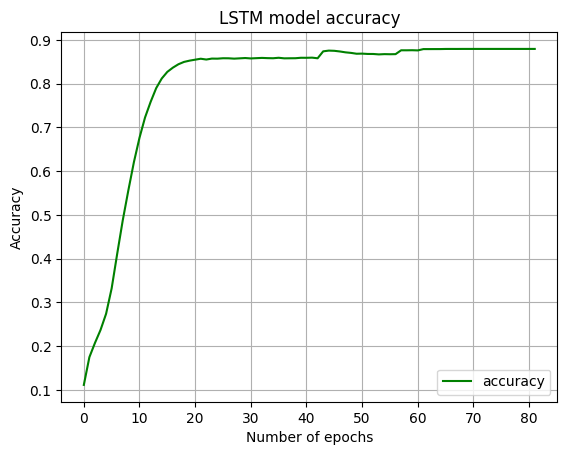

In [29]:
plt.plot(H.epoch,H.history['accuracy'],label='accuracy',color='green')
plt.grid()
plt.legend()
plt.title('LSTM model accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

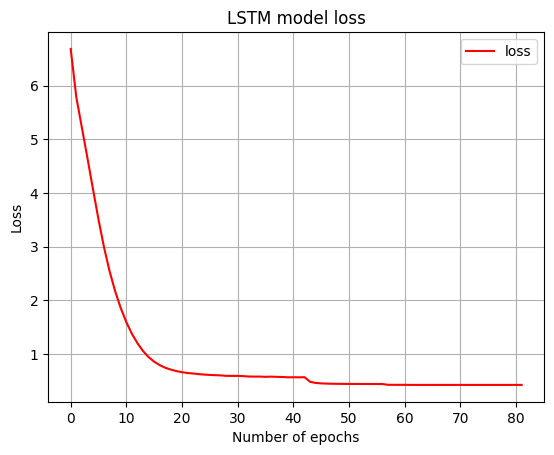

In [30]:
# plotting loss
plt.plot(H.epoch,H.history['loss'],label='loss',color='red')
plt.legend()
plt.grid()
plt.title('LSTM model loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

# GRU Model

In [31]:
adam=Adam(learning_rate=0.001)
path3='/content/GRU_next-word-{epoch:02d}-{accuracy:.4f}.h5'
cp2=ModelCheckpoint(filepath=path3,monitor='accuracy',mode='max',save_best_only=True,verbose=1)
call_b=[cp2,callback2,callback3]

In [32]:
model3=Sequential()
model3.add(Embedding(input_dim=n_words,output_dim=150,input_length=maxlen-1))
model3.add(GRU(300))
model3.add(Dense(n_words,activation='softmax'))

model3.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
H4=model3.fit(X,Y,epochs=200,callbacks=call_b,verbose=1)

Epoch 1/200
1598/1599 [============================>.] - ETA: 0s - loss: 6.5904 - accuracy: 0.1306
Epoch 1: accuracy improved from -inf to 0.13075, saving model to /content/GRU_next-word-01-0.1307.h5
1599/1599 [==============================] - 15s 8ms/step - loss: 6.5898 - accuracy: 0.1307 - lr: 0.0010
Epoch 2/200
1599/1599 [==============================] - ETA: 0s - loss: 5.5238 - accuracy: 0.2003
Epoch 2: accuracy improved from 0.13075 to 0.20028, saving model to /content/GRU_next-word-02-0.2003.h5
1599/1599 [==============================] - 14s 9ms/step - loss: 5.5238 - accuracy: 0.2003 - lr: 0.0010
Epoch 3/200
1593/1599 [============================>.] - ETA: 0s - loss: 4.7750 - accuracy: 0.2362
Epoch 3: accuracy improved from 0.20028 to 0.23615, saving model to /content/GRU_next-word-03-0.2361.h5
1599/1599 [==============================] - 14s 8ms/step - loss: 4.7748 - accuracy: 0.2361 - lr: 0.0010
Epoch 4/200
1594/1599 [============================>.] - ETA: 0s - loss: 3.9541

In [34]:
gru_model = load_model('/content/GRU_next-word-72-0.8791.h5')

In [35]:
gru_model.save('GRU_next_word_prediction.h5')

plotting accuracy and loss of GRU model

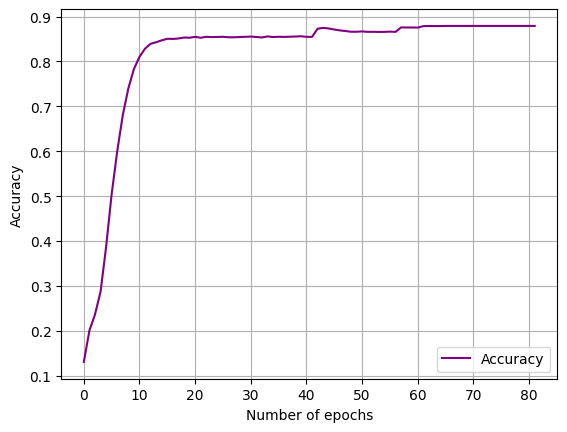

In [36]:
plt.plot(H4.epoch,H4.history['accuracy'],label='Accuracy',color='purple')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

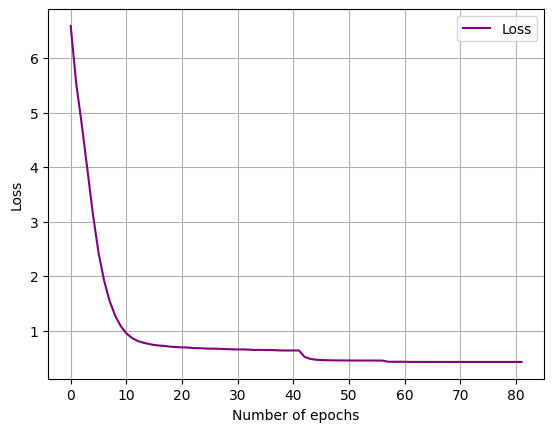

In [37]:
plt.plot(H4.epoch,H4.history['loss'],label='Loss',color='purple')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# Bidirectional LSTM

In [38]:
path4='/content/Bi-LSTM_next-word-{epoch:02d}-{accuracy:.4f}.h5'
check2=ModelCheckpoint(filepath=path4,monitor='accuracy',mode='max',save_best_only=True,verbose=1)
adam2=Adam(learning_rate=0.001)
call_b2=[check2,callback2,callback3]

In [39]:
model5=Sequential()
model5.add(Embedding(input_dim=n_words,output_dim=100,input_length=maxlen-1))
model5.add(Bidirectional(LSTM(300)))
model5.add(Dense(n_words,activation='softmax'))

model5.compile(optimizer=adam2,loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
H7=model5.fit(X,Y,epochs=200,callbacks=call_b2,verbose=1)

Epoch 1/200
1599/1599 [==============================] - ETA: 0s - loss: 6.7690 - accuracy: 0.0956
Epoch 1: accuracy improved from -inf to 0.09556, saving model to /content/Bi-LSTM_next-word-01-0.0956.h5
1599/1599 [==============================] - 22s 12ms/step - loss: 6.7690 - accuracy: 0.0956 - lr: 0.0010
Epoch 2/200
1597/1599 [============================>.] - ETA: 0s - loss: 5.8393 - accuracy: 0.1738
Epoch 2: accuracy improved from 0.09556 to 0.17387, saving model to /content/Bi-LSTM_next-word-02-0.1739.h5
1599/1599 [==============================] - 19s 12ms/step - loss: 5.8387 - accuracy: 0.1739 - lr: 0.0010
Epoch 3/200
1596/1599 [============================>.] - ETA: 0s - loss: 5.2508 - accuracy: 0.2072
Epoch 3: accuracy improved from 0.17387 to 0.20726, saving model to /content/Bi-LSTM_next-word-03-0.2073.h5
1599/1599 [==============================] - 19s 12ms/step - loss: 5.2506 - accuracy: 0.2073 - lr: 0.0010
Epoch 4/200
1597/1599 [============================>.] - ETA: 0s

## Plotting accuracy and loss

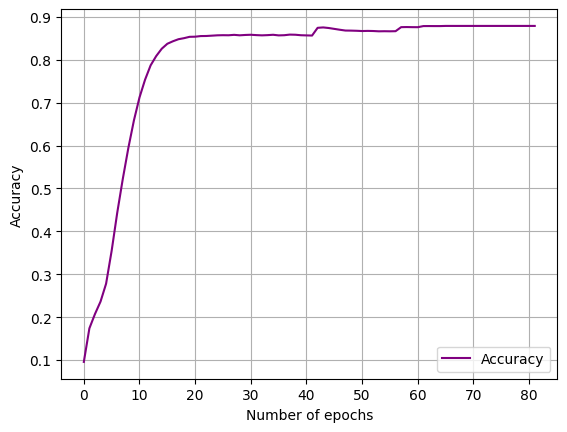

In [41]:
plt.plot(H7.epoch,H7.history['accuracy'],label='Accuracy',color='purple')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

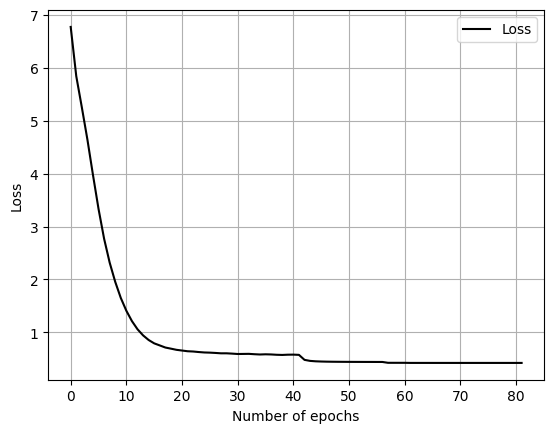

In [42]:
plt.plot(H7.epoch,H7.history['loss'],label='Loss',color='black')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

## Loading model

In [43]:
my_model=load_model('/content/lstm5_next_word_prediction.h5')

In [44]:
key=[]
values=[]
for i,r in tokenizer.word_index.items():
    key.append(i)

# Practical Implimentation

In [45]:
text2=input('Text : ')

p_text=[text2]

t_le2=[[]]
n_wo=int(input('n next words : '))
t_le=tokenizer.texts_to_sequences([text2])
t_le=pad_sequences(t_le,maxlen=maxlen-1,padding='pre')

for i in t_le[0]:
    t_le2[0].append(i)

t_le3=np.array(t_le2)

for _ in range(n_wo):
    pre33=np.argmax(my_model.predict(t_le3,verbose=0))
    p_text.append(key[pre33-1])
    t_le2[0].append(pre33)
    t_le2[0].pop(0)
    t_le3=np.array(t_le2)

full_text=" ".join([ww for ww in p_text])
print('Next ',n_wo,' words might be :')
print(full_text)


Text : what is the difference between correlation
n next words : 3
Next  3  words might be :
what is the difference between correlation of a data


# Feedback System

In [46]:
num_class=len(c)+1
feedback=input('Was it  use ful ? [yes/no] : ')
ch=[text2]
ch2=[]
lp=[]

if feedback == 'no':
    opt=input('What could have been the best result for your input text? : ')
    ch.append(opt)
    ch2.append(" ".join([c for c in ch]))
    new=(" ".join([s for s in ch]))
    tt_lis=tokenizer.texts_to_sequences([new])

    aa=sorted(list(range(1,len(tt_lis[0]))),reverse=True)
    le=len(tt_lis[0])+1
    for i in aa:
        lp.append(tt_lis[0][0:le-i])

    pad_s=np.array(pad_sequences(lp,maxlen=maxlen,padding='pre'))

    X1=pad_s[:, :-1]
    Y1=pad_s[:,-1]

    Y1=keras.utils.to_categorical(Y1,num_classes=len(tokenizer.word_index)+1)
    new_num_class=len(tokenizer.word_index)+1
    try:
        if new_num_class == num_class:

            for layers in my_model.layers[:-1]:
                layers.trainable = False

            my_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
            print('Learning....................')
            my_model.fit(X1,Y1,epochs=400,verbose=0)
            print('successfully learned')
            print('Thank you for the feedback')
        else:
            print('The the number of class should be same')
    except Exception as ex:
        print(ex)

elif feedback == 'yes':
    print('thank you for your feedback')
else:
    print("Input must be ether 'yes' or 'no'")

Was it  use ful ? [yes/no] : no
What could have been the best result for your input text? : and auto correlation
Learning....................
successfully learned
Thank you for the feedback


# Repeating practical implimentation part again

In [47]:
'''Here we are going to pass the same sentence to see the difference after using
feedback system'''

text2=input('Text : ')

p_text=[text2]

t_le2=[[]]
n_wo=int(input('n next words : '))
t_le=tokenizer.texts_to_sequences([text2])
t_le=pad_sequences(t_le,maxlen=maxlen-1,padding='pre')

for i in t_le[0]:
    t_le2[0].append(i)

t_le3=np.array(t_le2)

for _ in range(n_wo):
    pre33=np.argmax(my_model.predict(t_le3,verbose=0))
    p_text.append(key[pre33-1])
    t_le2[0].append(pre33)
    t_le2[0].pop(0)
    t_le3=np.array(t_le2)

full_text=" ".join([ww for ww in p_text])
print('Next ',n_wo,' words might be :')
print(full_text)

Text : what is the difference between correlation
n next words : 3
Next  3  words might be :
what is the difference between correlation and auto correlation


## Compearing all models loss and accuracy

## Accuracy fluctuations

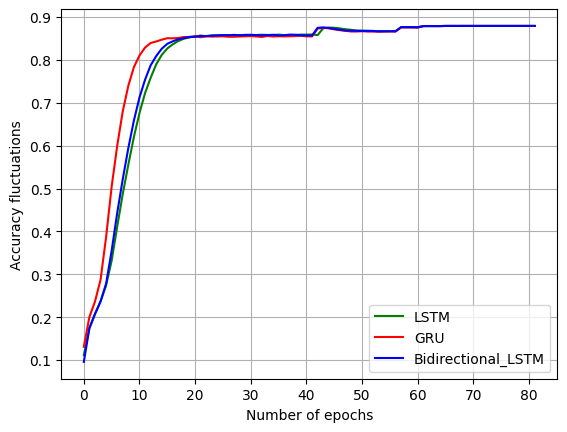

In [48]:
plt.plot(H.epoch[0:82],H.history['accuracy'][0:82],color='green',label='LSTM')
plt.plot(H4.epoch[0:82],H4.history['accuracy'][0:82],color='red',label='GRU')
plt.plot(H7.epoch,H7.history['accuracy'],color='blue',label='Bidirectional_LSTM')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy fluctuations')
plt.legend()
plt.grid()
plt.show()

## Fluctuations of loss with the number of epochs

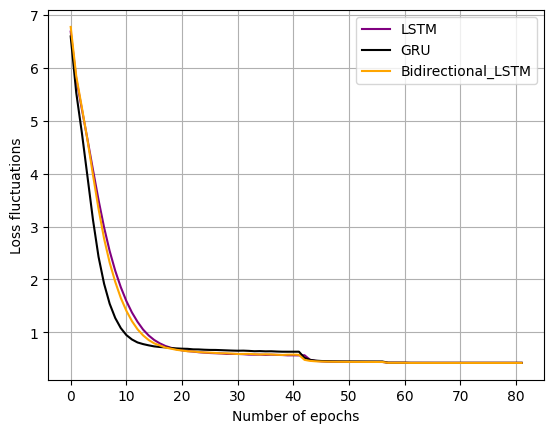

In [49]:
plt.plot(H.epoch[0:82],H.history['loss'][0:82],color='purple',label='LSTM')
plt.plot(H4.epoch[0:82],H4.history['loss'][0:82],color='black',label='GRU')
plt.plot(H7.epoch,H7.history['loss'],color='orange',label='Bidirectional_LSTM')
plt.xlabel('Number of epochs')
plt.ylabel('Loss fluctuations')
plt.legend()
plt.grid()
plt.show()

In [50]:
'''Thank you'''

'Thank you'